### Boxplots
Los boxplots, también conocidos como diagramas de caja, son una herramienta útil para visualizar la distribución de un conjunto de datos. Te permiten ver rápidamente la mediana, los cuartiles y los posibles valores atípicos en tus datos. Aquí te doy una introducción sobre cómo funcionan y cómo puedes crearlos usando matplotlib.

#### Caja (Box):

    Límites Inferiores y Superiores de la Caja: Representan el primer cuartil (Q1) y el tercer cuartil (Q3) respectivamente. La caja se extiende desde Q1 hasta Q3.

    Mediana: Una línea dentro de la caja que indica el segundo cuartil (Q2) o la mediana del conjunto de datos.

#### Bigotes (Whiskers):

    Se extienden desde los cuartiles hasta el valor mínimo y máximo dentro de 1.5 veces el rango intercuartílico (IQR = Q3 - Q1) desde los cuartiles. Los bigotes muestran la dispersión de los datos fuera de la caja.

#### Valores Atípicos (Outliers):

    Los puntos que caen fuera de los bigotes se consideran valores atípicos y se muestran individualmente.

#### ¿Cómo Leer un Boxplot?

 - Mediana: La línea dentro de la caja. Muestra el valor central de los datos.
 - Caja: La longitud de la caja representa la variabilidad entre los cuartiles.
 - Bigotes: Muestran la dispersión de los datos fuera del rango intercuartílico. Si los bigotes son cortos, los datos están más concentrados.
 - Valores Atípicos: Los puntos fuera de los bigotes indican valores inusuales o extremos.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generamos datos de ejemplo
np.random.seed(10)
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# Crear un boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=['Grupo 1', 'Grupo 2', 'Grupo 3'])
plt.title('Boxplot de Datos de Ejemplo')
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.show()

In [ ]:
import pandas as pd

# ahora crearemos 3 ejemplos de datos diferentes con numpy.
# uno para distribución nomal, uno aleatorio y otro con una distribución gamma
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

# los metemos en un dataframe y lo mostramos
df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

# con el método describe podemos obtener unas estadisticas básicas sobre nuestro dataframe
df.describe()

Esta función muestra los valores mínimo y máximo, así como tres valores porcentuales diferentes. Estos valores porcentuales forman lo que se llama el rango intercuartílico. Hay cuatro cuartiles diferentes de los datos. El primero está entre el valor mínimo y el primer 25% de los datos, y este valor del 25% se llama el primer cuartil. El segundo cuartil de los datos está entre el 25% y el 50% de los datos. El tercero está entre el 50% y el 75% de los datos. El valor del 75% se llama el tercer cuartil. Y la última parte de los datos está entre el 75% y el máximo de los datos.

Al igual que la desviación estándar, el rango intercuartílico es una medida de la variabilidad de los datos. Es común graficar esto usando un diagrama de caja (boxplot). En un diagrama de caja, la media, o la mediana, de los datos se grafica como una línea recta. Se forman dos cajas: una arriba, que representa el grupo de datos del 50% al 75%, y una abajo, que representa el grupo de datos del 25% al 50%. Luego, se dibujan líneas delgadas hasta los valores mínimo y máximo.

In [ ]:
# para dibujar el gráfico le pasamos la columna en la que estamos interesados
plt.boxplot(df['normal'])

In [ ]:
# también podemos dibujar los gráficos para las 3 columnas a la vez
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100])

In [ ]:
# para entender mejor la dispersión vamos a dibujar tambien el histograma de gamma
plt.hist(df['gamma'], bins=100)

Interesante, vemos que comienza a un nivel moderado, aumenta abruptamente, luego cae mucho más gradualmente y de hecho tiene una cola muy larga. Vamos a añadir esto a nuestro diagrama de caja, y voy a aprovechar la oportunidad para demostrar algo llamado ejes incrustados (inset axes).

Recuerda que tenemos una figura con un solo subplot. Dado que no hicimos nada especial con los subplots, eso significa que solo tenemos un objeto de ejes. En realidad, podemos superponer un eje sobre otro dentro de una figura. Lo hacemos llamando a la función inset_axes en la figura y enviando los detalles de los nuevos ejes que queremos crear. Los detalles que enviamos son una posición en el espacio x/y y el ancho y la altura del nuevo gráfico.

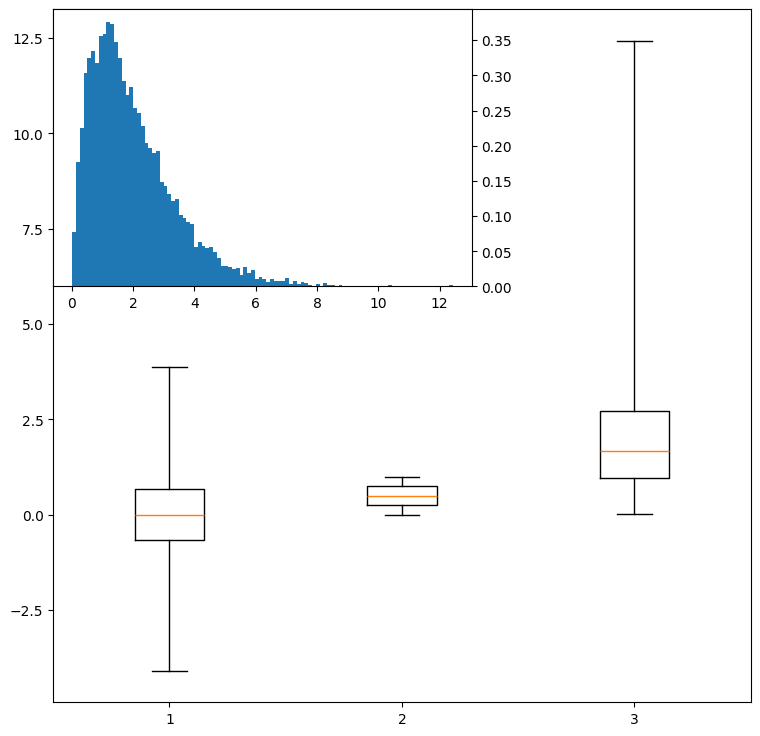

In [7]:
plt.figure(figsize=(9,9))

# se crea un diagrama de caja para tres conjuntos de datos (normal, random, gamma) del DataFrame df. 
# whis=[0,100] ajusta el rango de los bigotes para que se extiendan desde el mínimo hasta el máximo 
# valor de los datos (en lugar del valor predeterminado que suele ser 1.5 veces el rango intercuartílico).
plt.boxplot([df['normal'], df['random'], df['gamma']], whis=[0,100])

# plt.gca() obtiene el eje actual (en este caso, el eje del diagrama de caja). 
# inset_axes([0,0.6,0.6,0.4]) crea un nuevo conjunto de ejes dentro de la figura actual. 
# El primer par de valores [0,0.6] especifica la posición (esquina inferior izquierda) en 
# coordenadas de la figura (0 a 1), y el segundo par [0.6,0.4] especifica el ancho y la 
# altura del nuevo conjunto de ejes.
ax2 = plt.gca().inset_axes([0,0.6,0.6,0.4])

# Se traza un histograma del conjunto de datos gamma dentro del nuevo conjunto de ejes ax2.
# bins=100 especifica el número de bins (intervalos) para el histograma.
# density=True normaliza el histograma para que el área total sea igual a 1, mostrando 
# la densidad de probabilidad.
ax2.hist(df['gamma'], bins=100, density=True)

# mueve las etiquetas del eje y al lado derecho del histograma, para evitar el choque con el
# diagrama de caja principal.
ax2.yaxis.tick_right();


Recuerda que cada diagrama de caja es nuestro resumen de cinco números: una línea de mediana en rojo en el centro, luego dos cajas a cada lado que representan el 25% de la población, respectivamente, y luego los bigotes que se extienden hasta los máximos y mínimos de los datos. 

A menudo queremos observar un diagrama de caja no solo viendo los valores máximos y mínimos, sino enfatizando los valores atípicos. Estos son todos los puntos de datos que están por encima o por debajo de la distancia entre el umbral (la parte inferior o superior de la caja, o primer y tercer cuartil) y 1.5 veces el rango intercuartílico (IQR). El rango intercuartílico es la distancia entre los dos umbrales, que captura el 50% de nuestros datos. Así que, si omitimos el parámetro whis en la llamada al diagrama de caja, veremos los valores atípicos utilizando este método representados gráficamente.

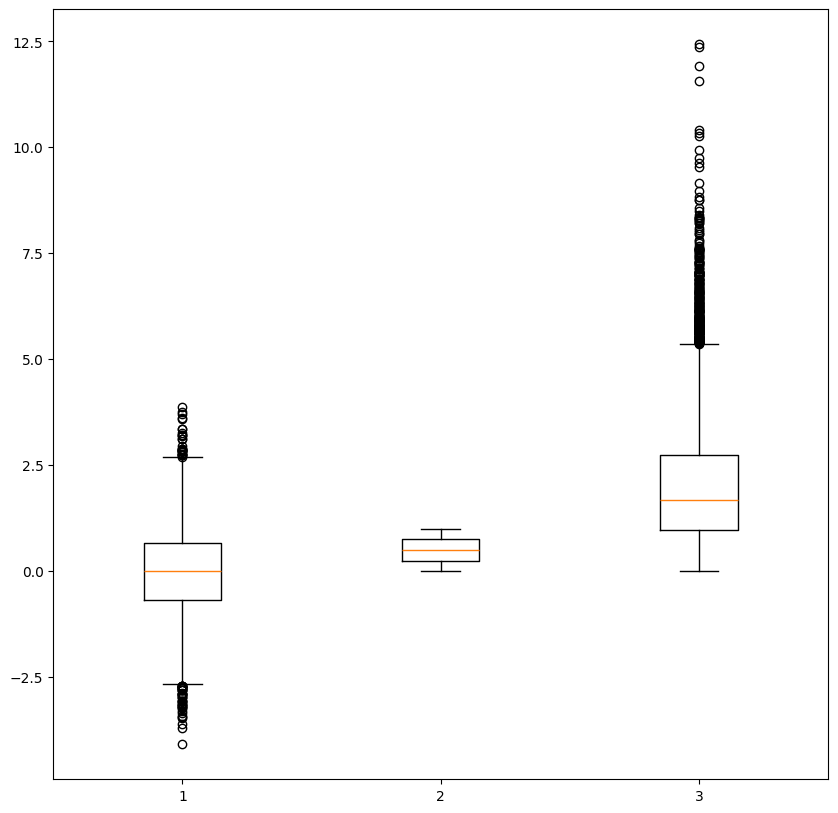

In [8]:
plt.figure(figsize=(10,10))

# con outliners (valores atipicos)
plt.boxplot([ df['normal'], df['random'], df['gamma'] ])

En el gráfico de más arriba usabamos whis=[0,100], que establece los bigotes del diagrama de caja en los valores mínimo y máximo de los datos, lo que significa que los valores atípicos no se identifican ni se muestran explícitamente.

Al no especificar nada en el gráfico anterior whis se mantiene por defecto (1.5), los bigotes del diagrama de caja se extienden hasta 1.5 veces el rango intercuartílico desde el primer y tercer cuartil. Los puntos que están fuera de este rango se identifican como valores atípicos y se muestran como puntos individuales.